# 波士顿房价预测
## 1.线性回归

d:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

0.7608593568991628


<ipython-input-27-f97d0768af0e>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()
<ipython-input-27-f97d0768af0e>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()
<ipython-input-27-f97d0768af0e>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()
<ipython-input-27-f97d0768af0e>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()


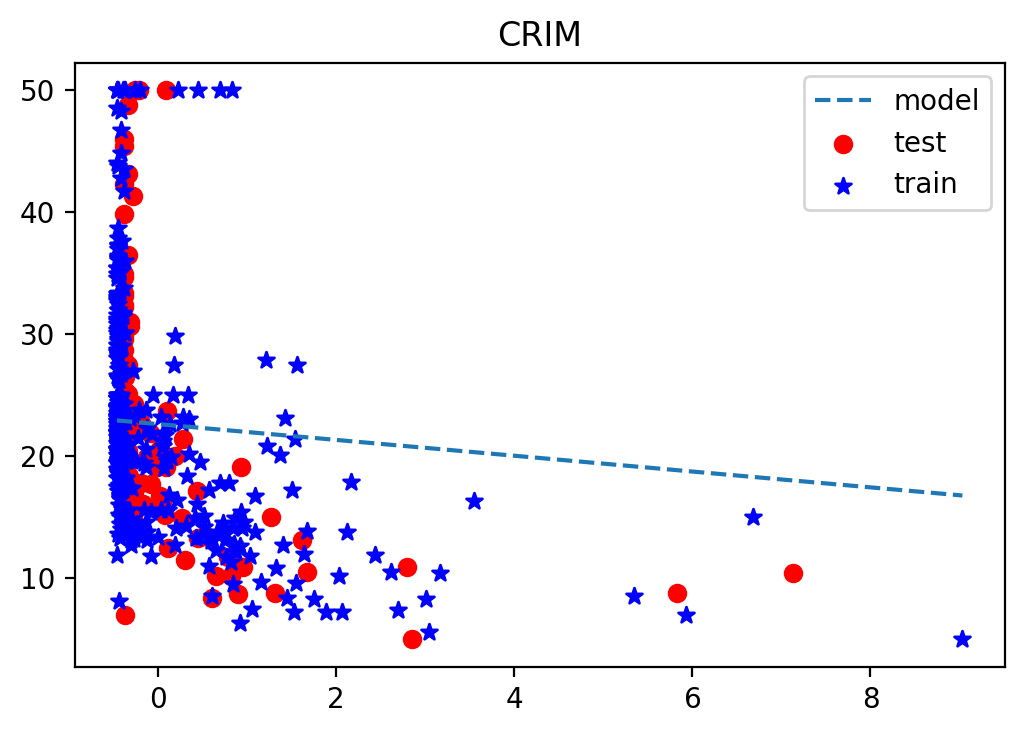

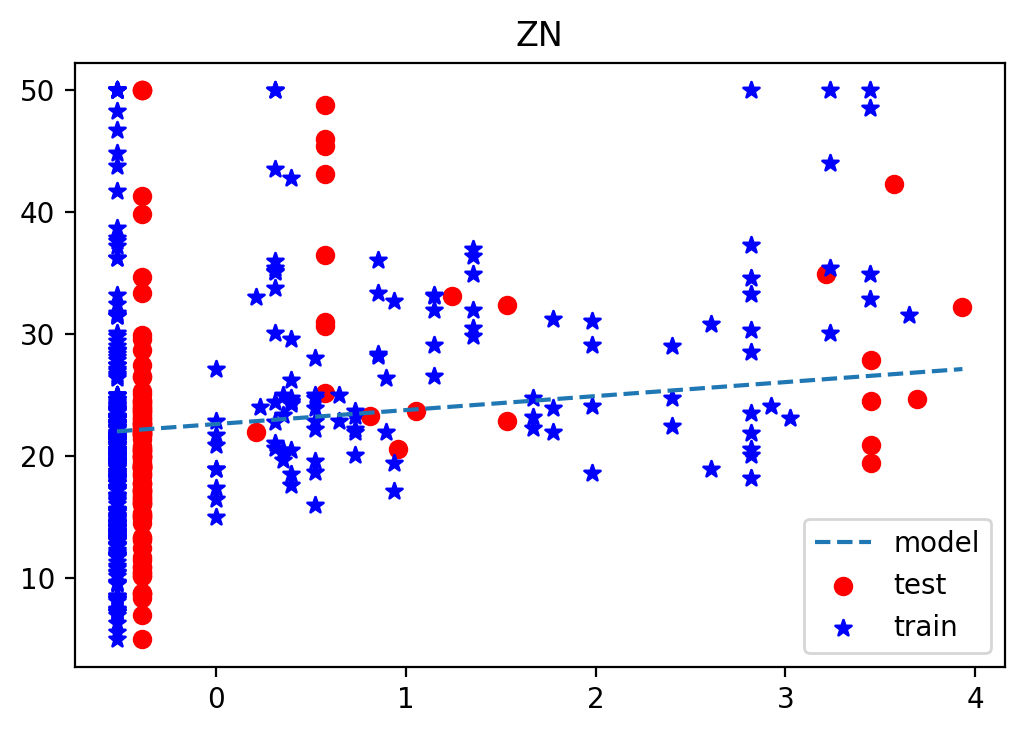

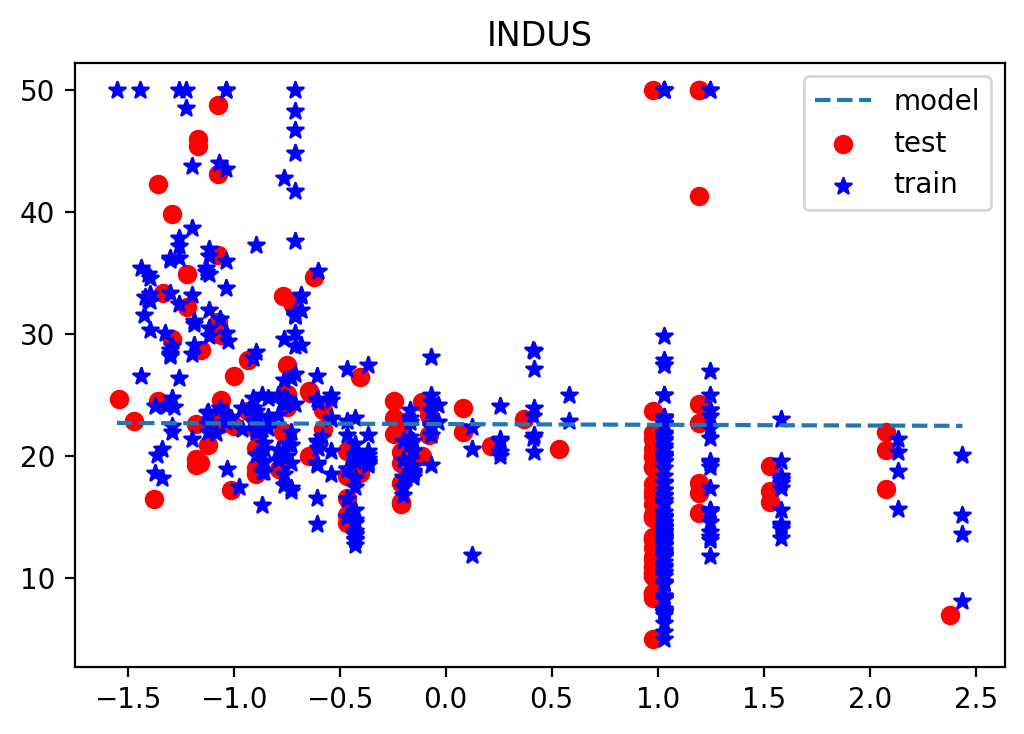

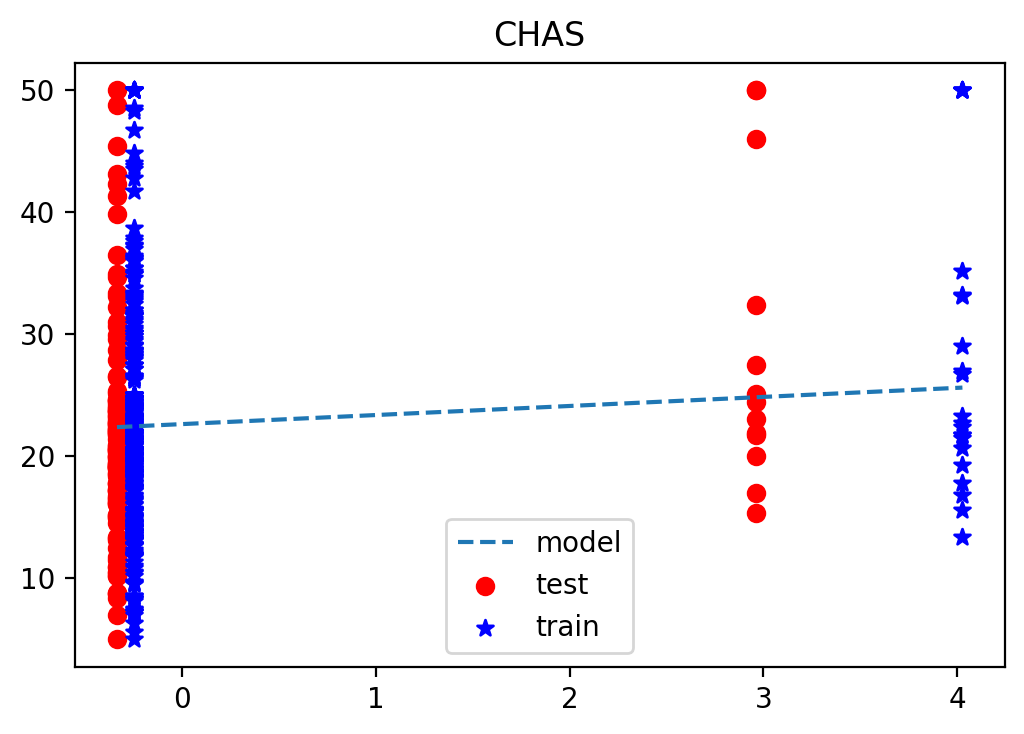

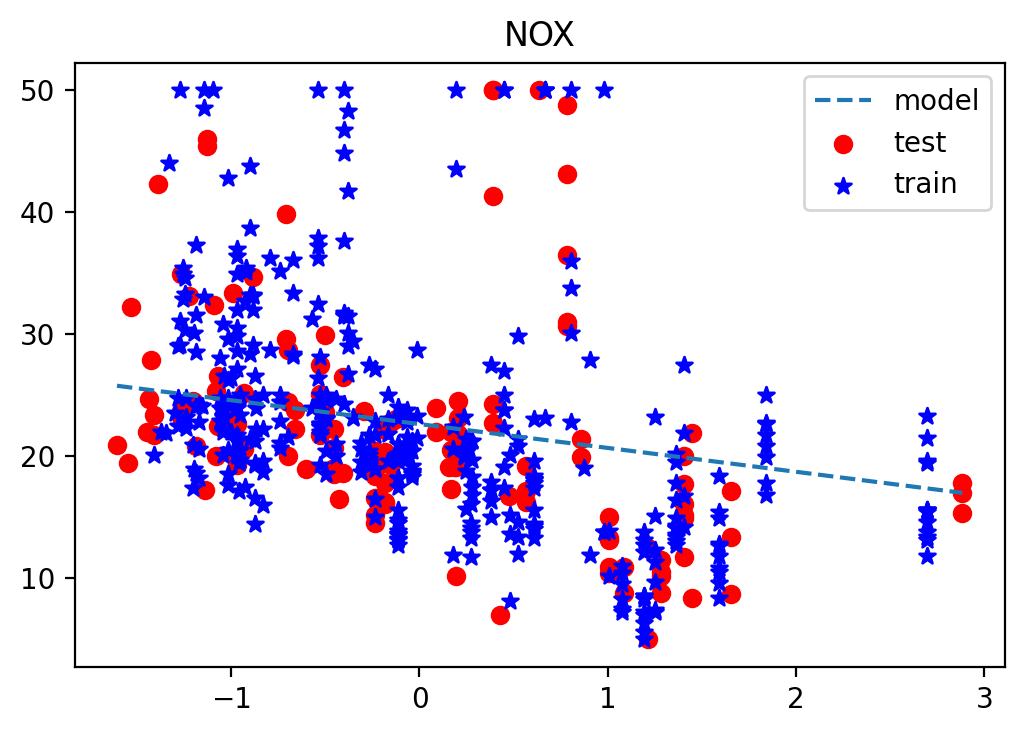

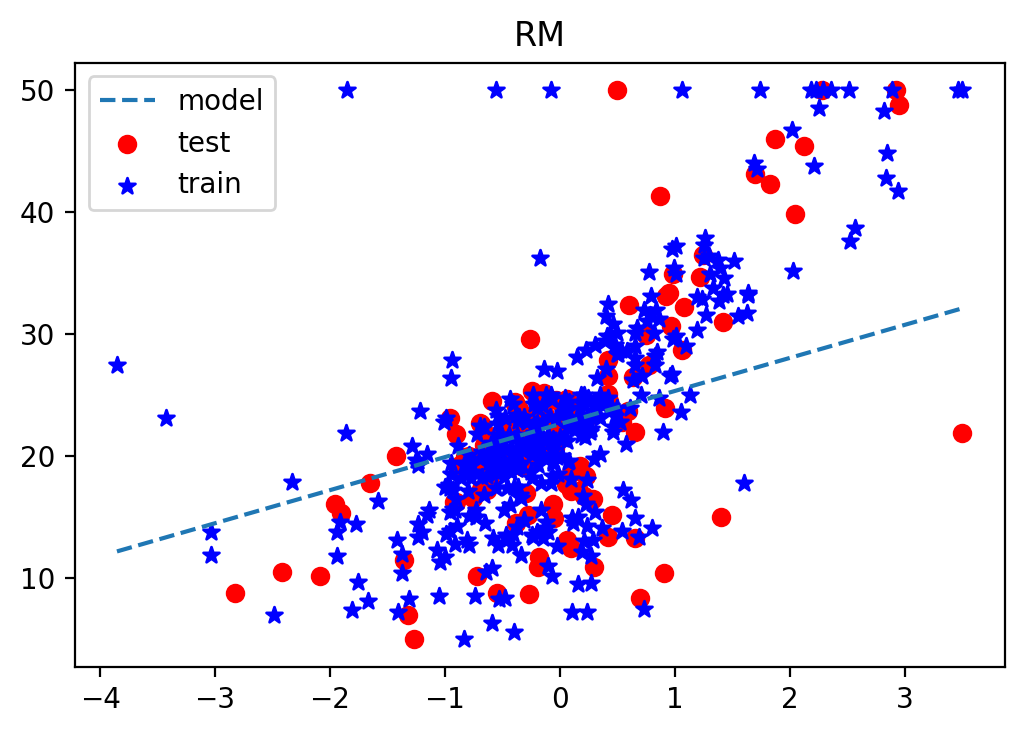

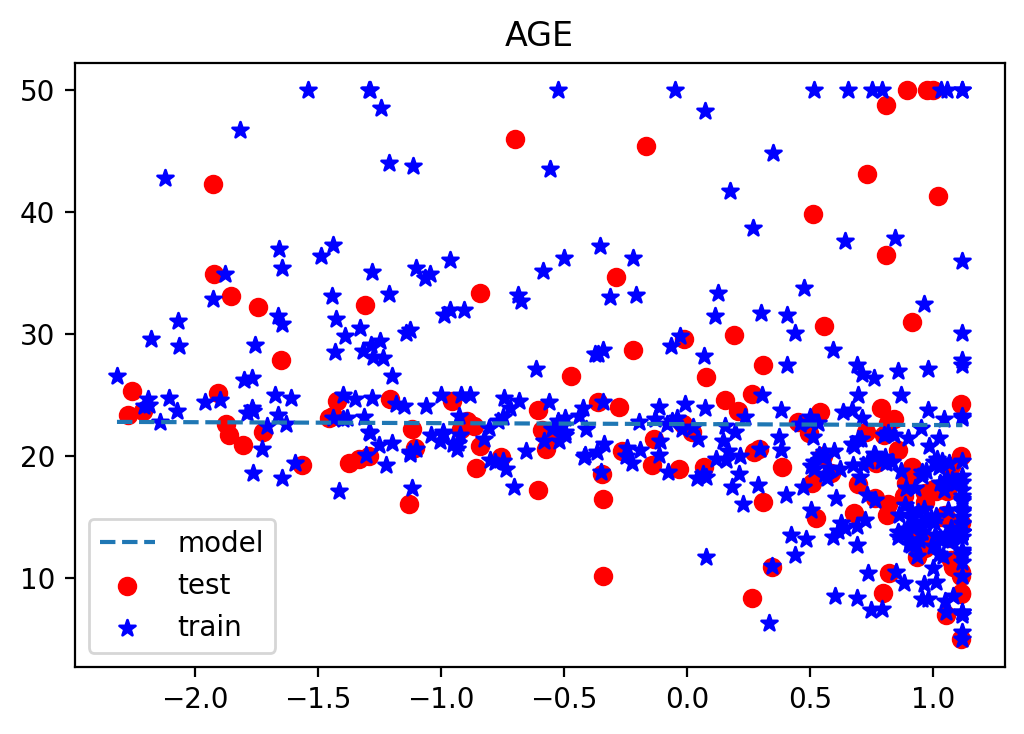

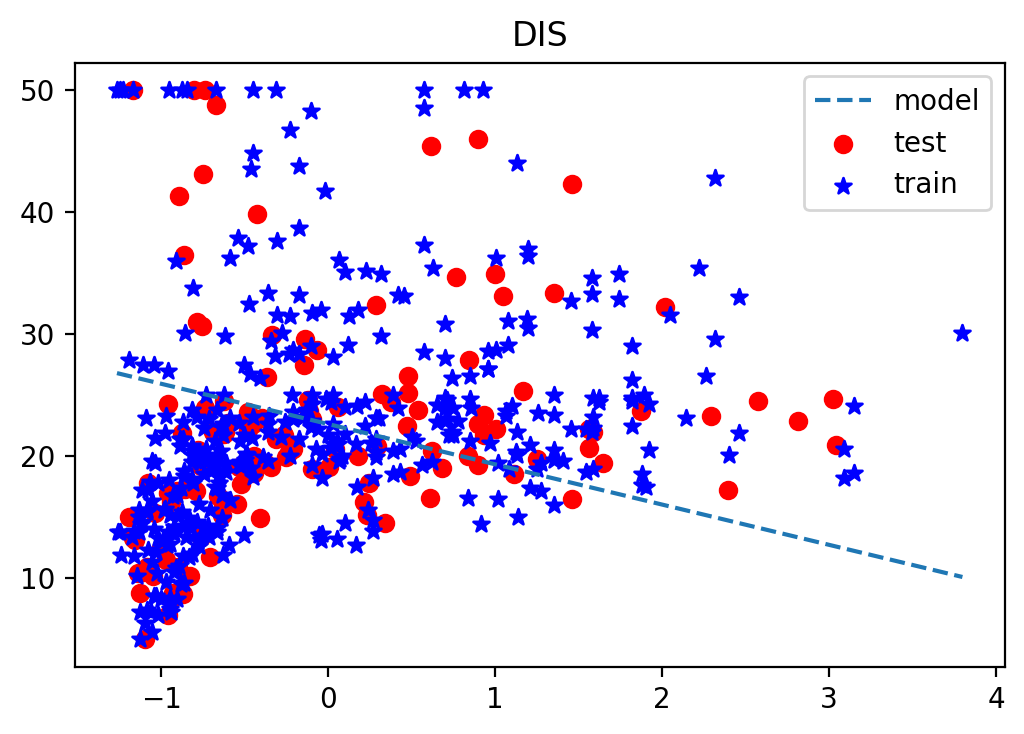

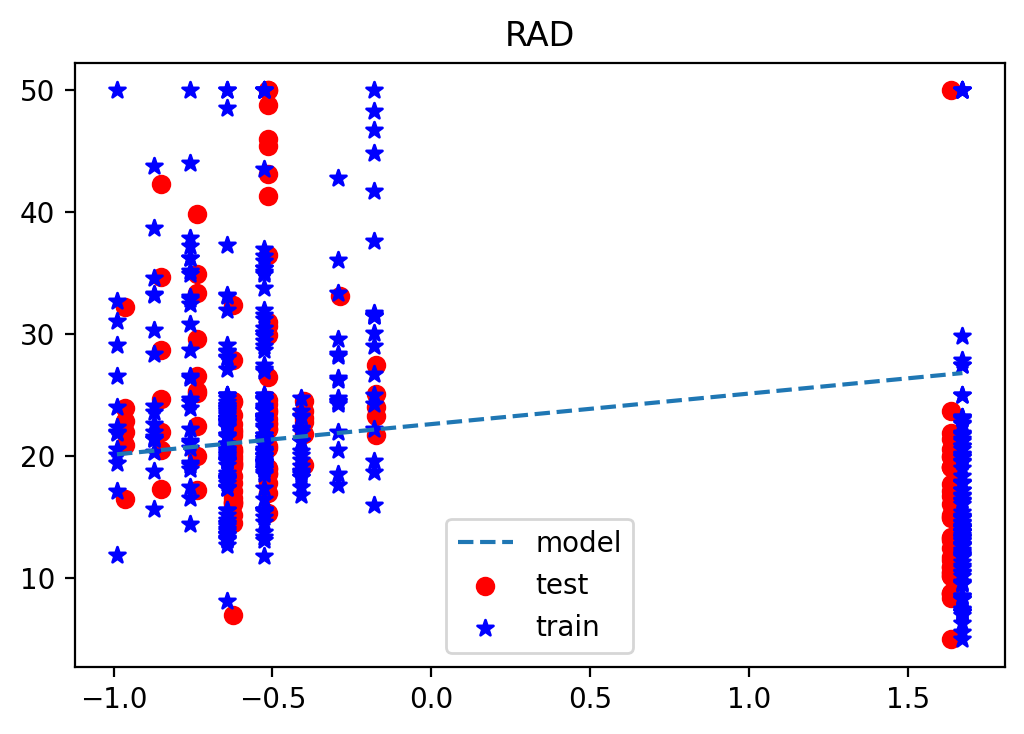

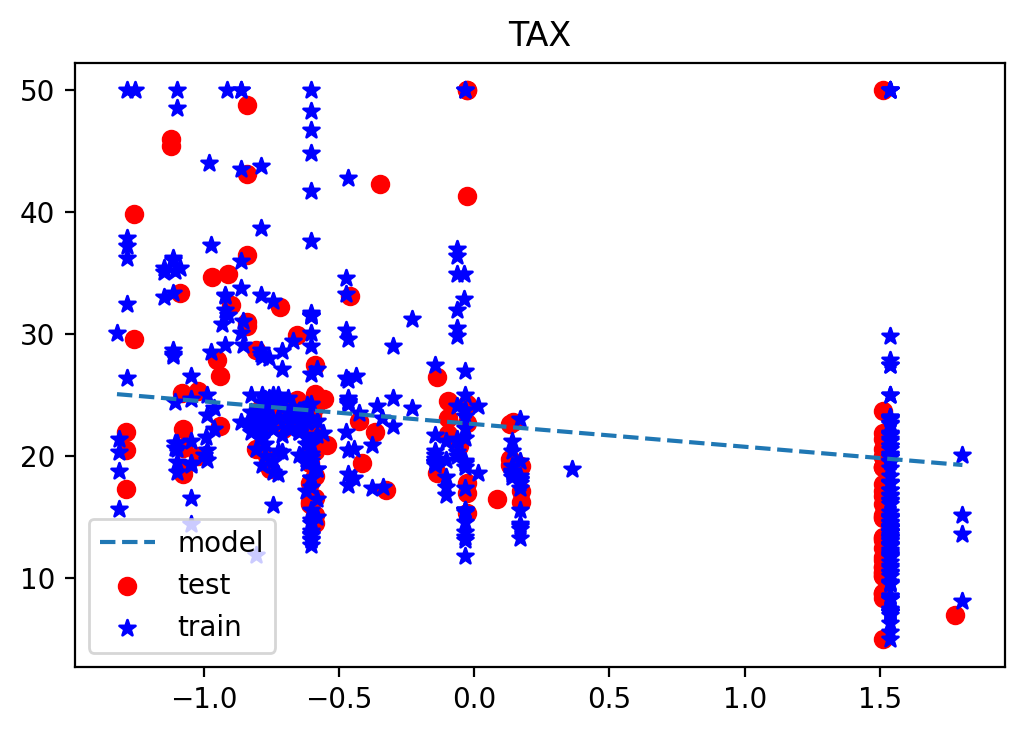

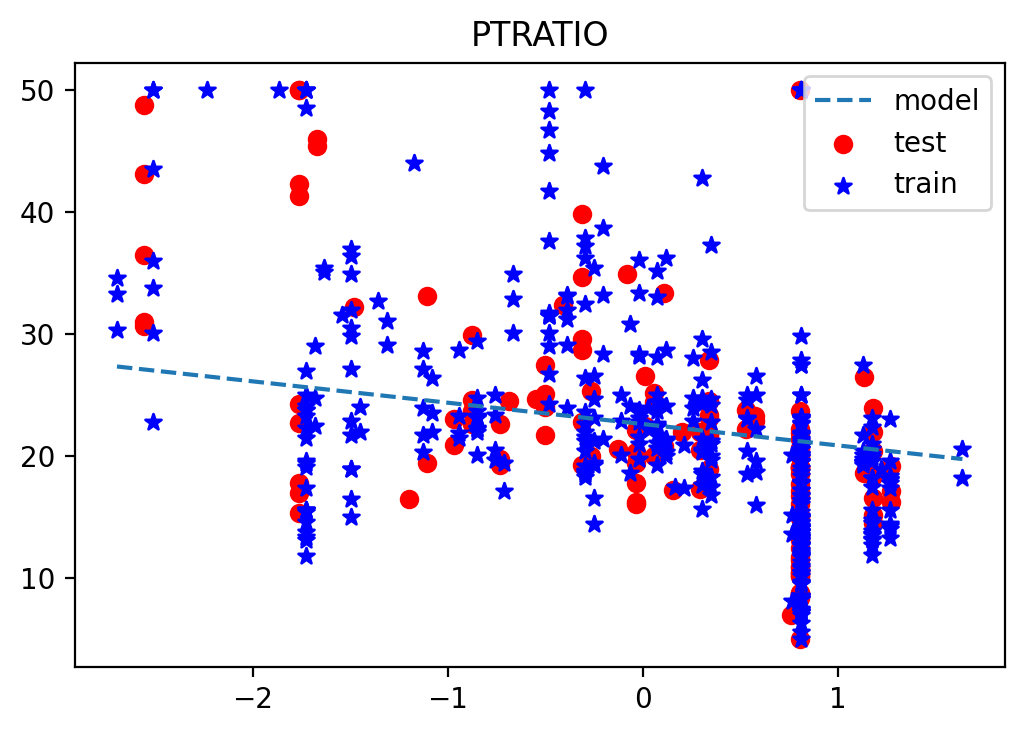

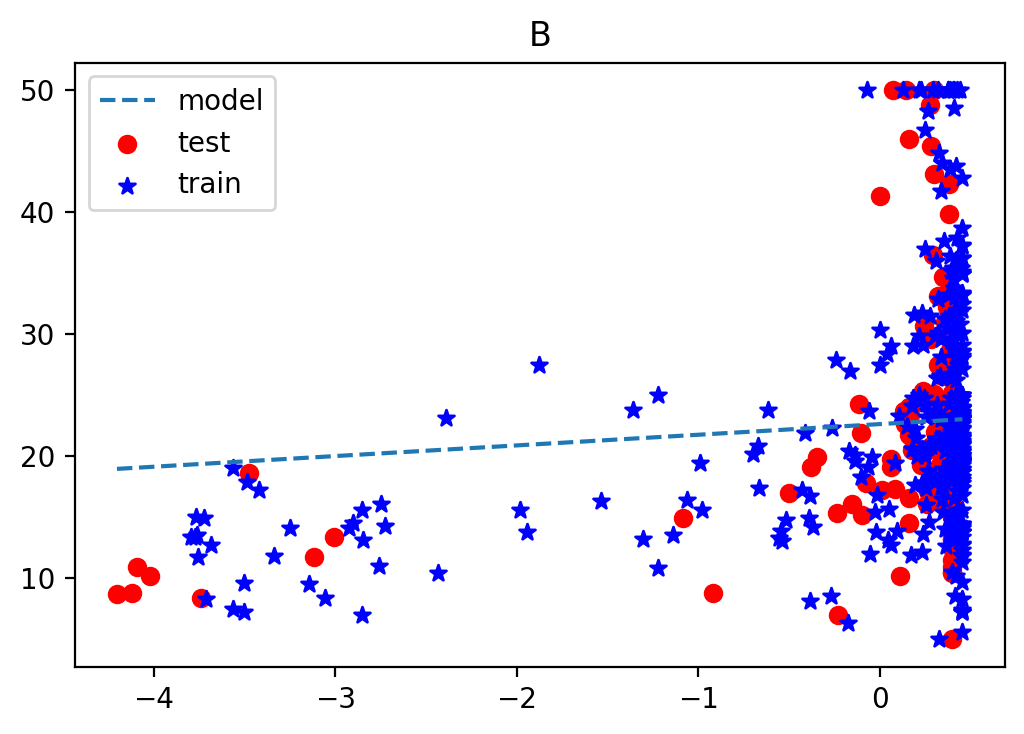

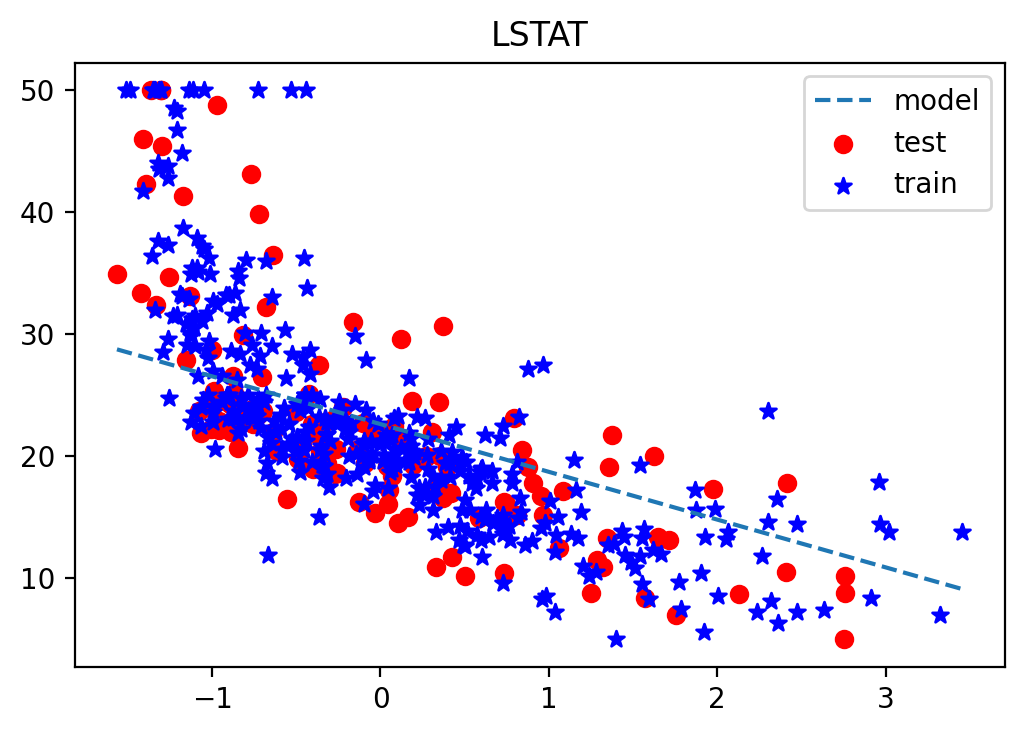

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 把数据拆分为训练数据和测试数据
boston_data = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target, test_size=0.25, random_state=22)

# 数据预处理
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# 模型拟合
estimator = LinearRegression()
estimator.fit(x_train, y_train)
est_coef = estimator.coef_
est_intpt = estimator.intercept_

# 数据预测
y_predict = estimator.predict(x_test)

# 模型评价
print(estimator.score(x_test, y_test))

feature_name = boston_data.feature_names

# 结果可视化
for i in range(feature_name.shape[0]):
    xi_test = x_test[:, i]
    xi_train = x_train[:, i]
    xi_hstack = np.hstack((xi_train, xi_test))
    xi_max = np.max(xi_hstack)
    xi_min = np.min(xi_hstack)
    x_line = np.linspace(xi_min, xi_max, 1000)
    y_line = x_line*est_coef[i] + est_intpt
    temp_fig = plt.figure(i, dpi=200)
    
    plt.title(feature_name[i])
    plt.scatter(x=xi_test, y=y_test, marker='o', c='red', label='test')
    plt.scatter(x=xi_train, y=y_train, marker='*', c='blue', label='train')
    plt.plot(x_line, y_line, '--', label='model')
    plt.legend()
    temp_fig.show()

## 2.梯度下降回归法优化损失函数
回归模型定义：$h_{\theta}(x_0, x_1, \dots, x_n)=\sum_{i=0}^{n}\theta _{i}x_i$

损失函数定义：$J(\theta _{0}, \theta _1, \dots, \theta _n) = \frac{1}{2m}\sum^{m}_{j=0}(h_{\theta}(x_{0}^{(j)}, x_{1}^{(j)}, \dots, x_n^{(j)})-y^{(j)})^2 $

对于梯度下降法，损失函数是优化过程的目标函数，因此针对$\theta $的每个变量求偏导，可以得到：$$\frac{\partial}{\partial{\theta_i}}J(\theta _0, \theta _1, \dots, \theta _n) = \frac{1}{m} \sum^{m}_{j=0}(h_{\theta}(x_{0}^{(j)}, x_{1}^{(j)}, \dots, x_n^{(j)})-y^{(j)})x_i^{(j)} $$

因此在梯度下降法更新坐标的过程中，每一步迭代更新的坐标变成：$$\theta _i = \theta _i - \alpha \frac{1}{m} \sum^{m}_{j=0}(h_{\theta}(x_{0}^{(j)}, x_{1}^{(j)}, \dots, x_n^{(j)})-y^{(j)})x_i^{(j)} $$

其中$\alpha$是学习率。

### 几种梯度下降方法
- 全梯度下降方法：每次更新模型时带入所有的样本来计算$\theta $,如上式，即j取从0-n，这样做的缺点也是非常明显的，即**样本数据量非常大时处理非常耗时**
- 随机梯度下降方法：每次随机选取一个样本来带入计算更新模型参数，形式为: $\theta _i =\theta _i - \alpha(h_\theta(x_0^{(j)}, x_1^{(j)}, \dots, x_n^{(j)})-y^{(j)})x_i^{(j)} $
- 小批量梯度下降方法：每次从样本集上随机抽取一个小样本，在抽出来的小样本集上更新模型参数，形式为：$\theta _i =\theta _i - \alpha \sum^{t+x-1}_{j=t}(h_\theta(x_0^{(j)}, x_1^{(j)}, \dots, x_n^{(j)})-y^{(j)})x_i^{(j)} $
- 随机平均梯度下降算法：随机平均梯度算法在内存中为每个样本都维护了一个旧的梯度，随机选择第i个样本来更新此样本的梯度，其它样本的梯度保持不变，然后求得所有梯度的平均值，进而更新参数。

d:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

0.759270343957562


<ipython-input-28-5a3cf982b979>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()
<ipython-input-28-5a3cf982b979>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()
<ipython-input-28-5a3cf982b979>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()


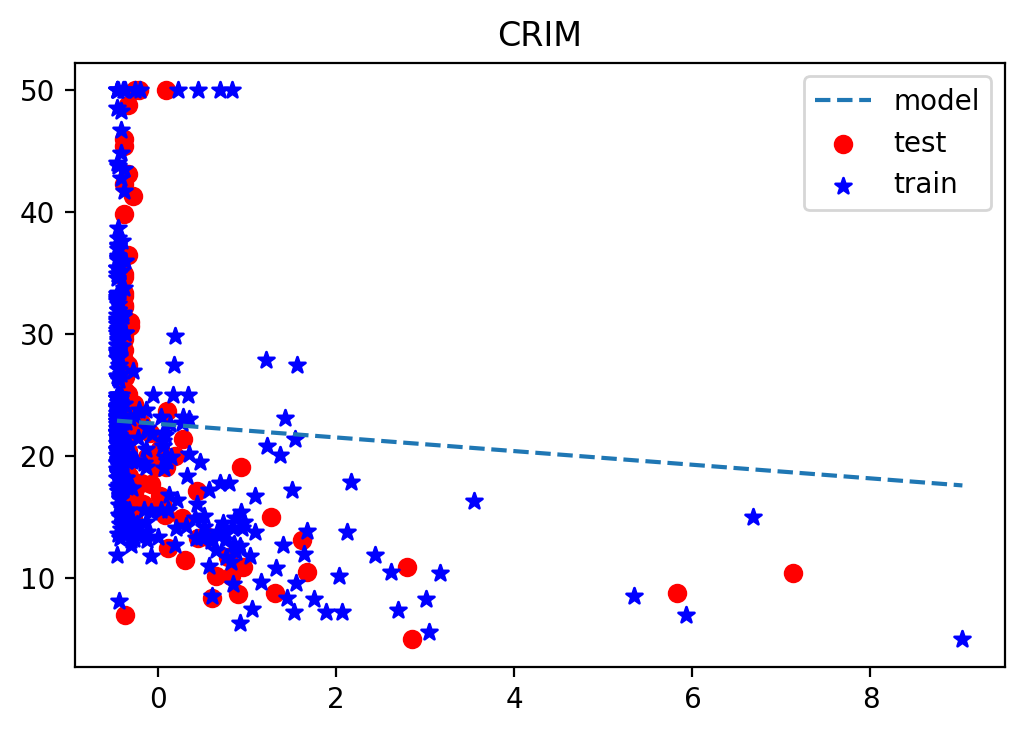

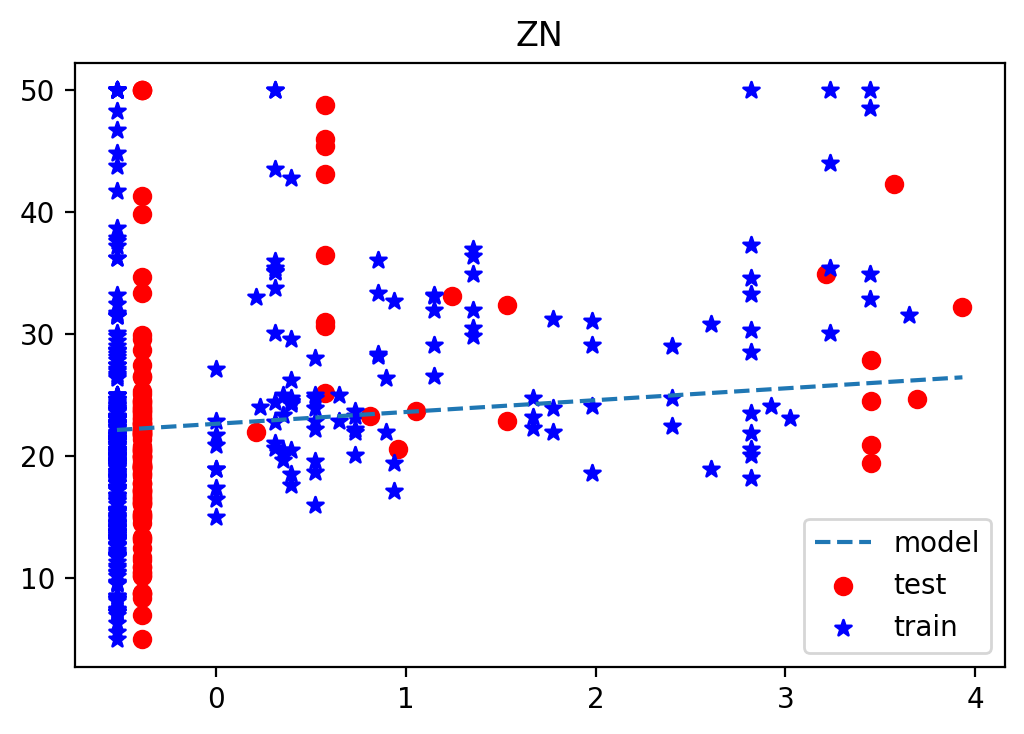

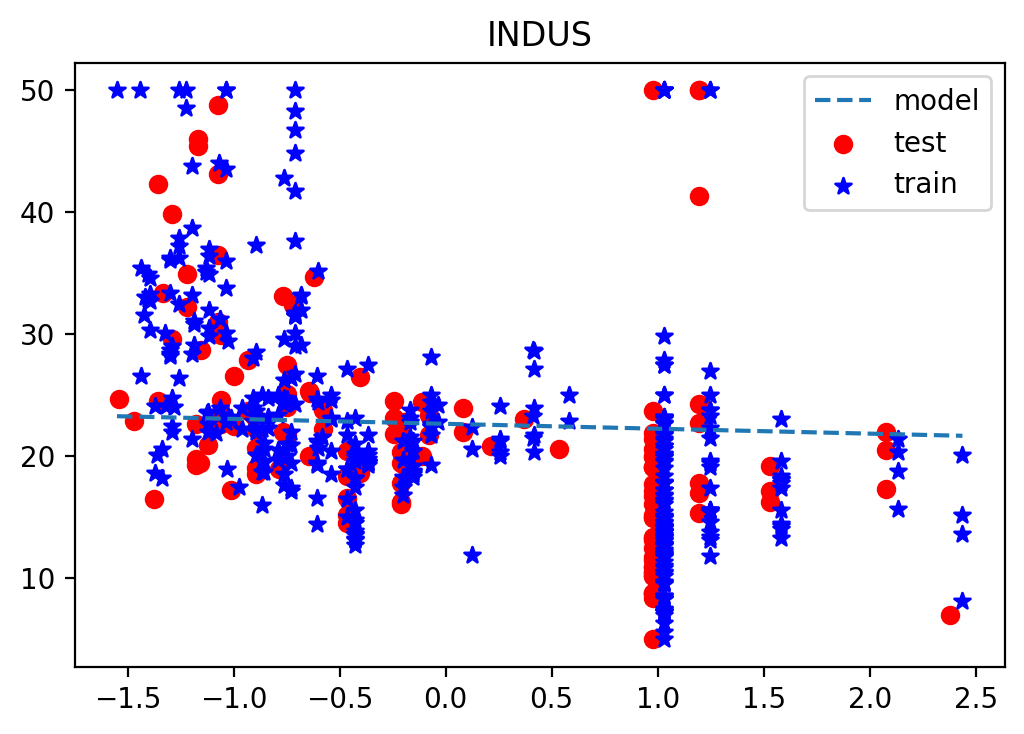

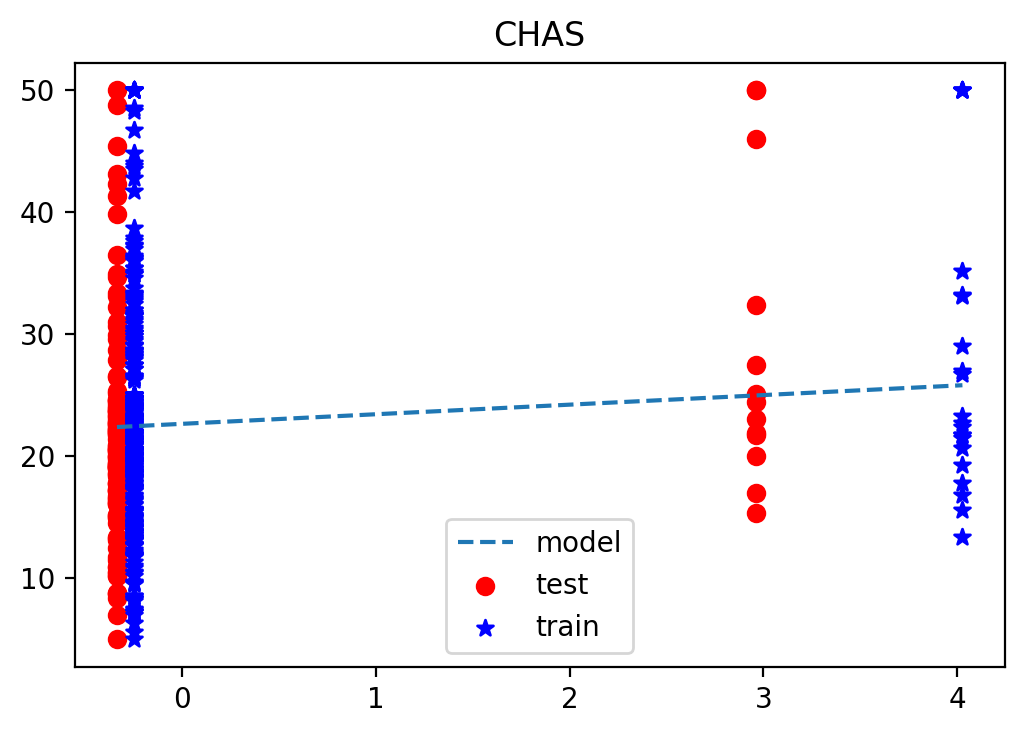

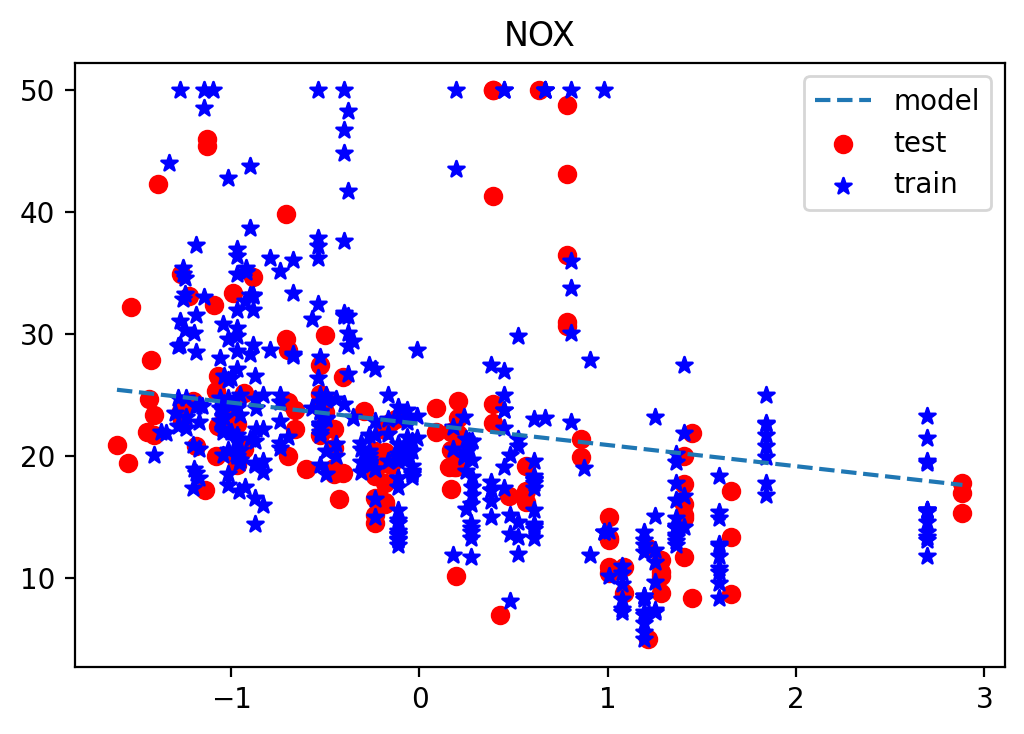

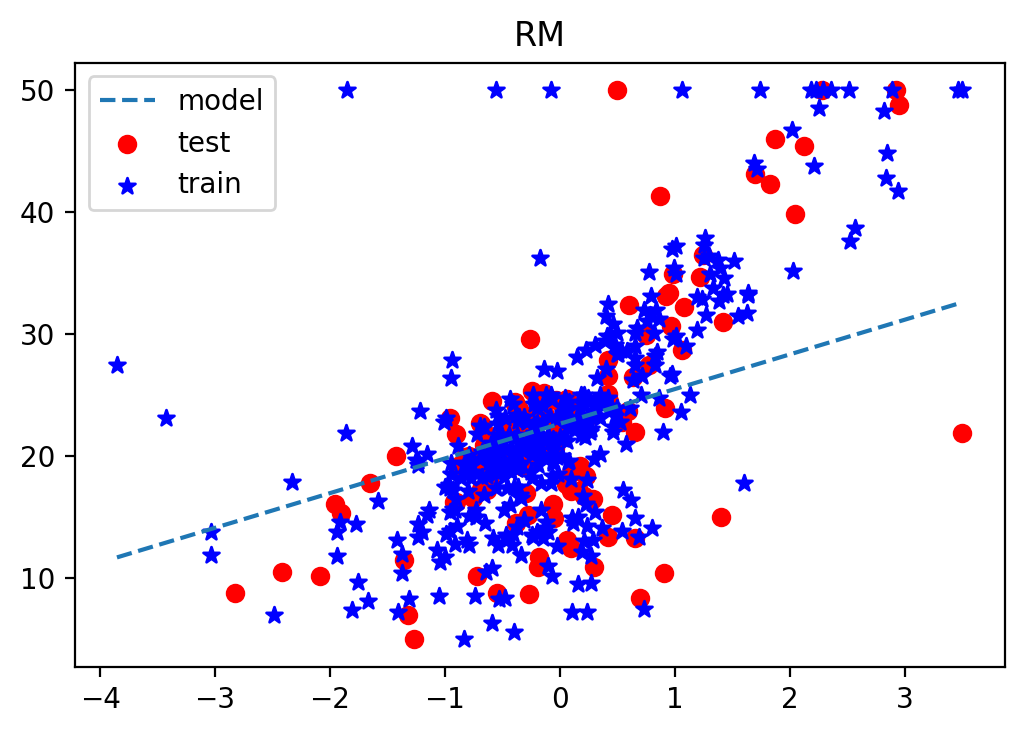

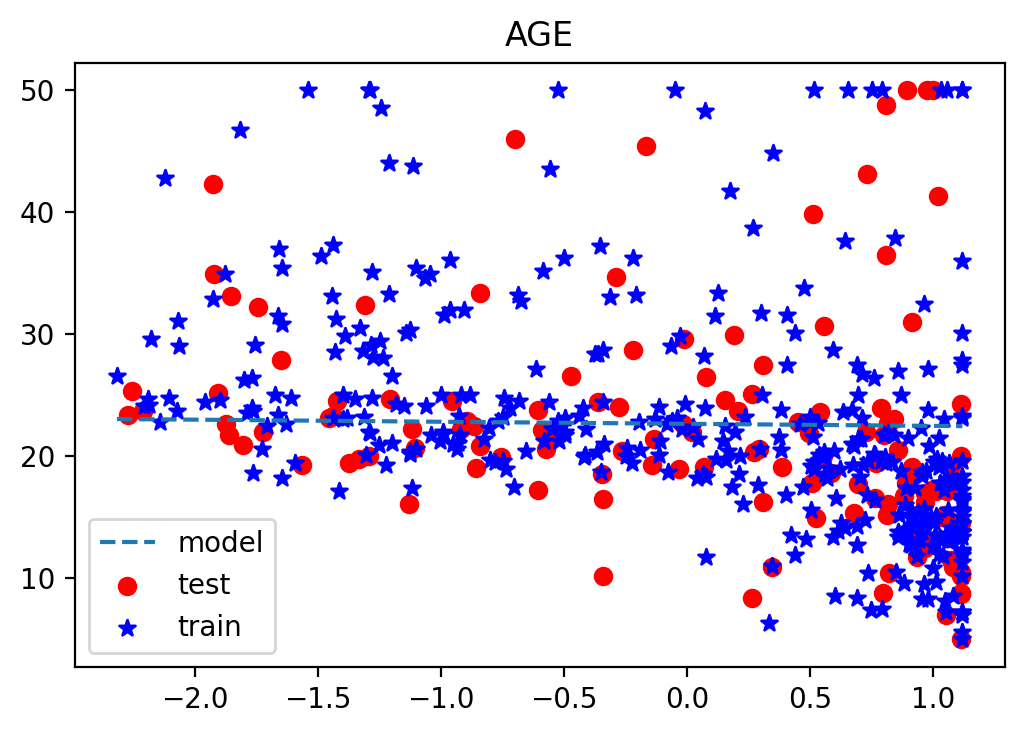

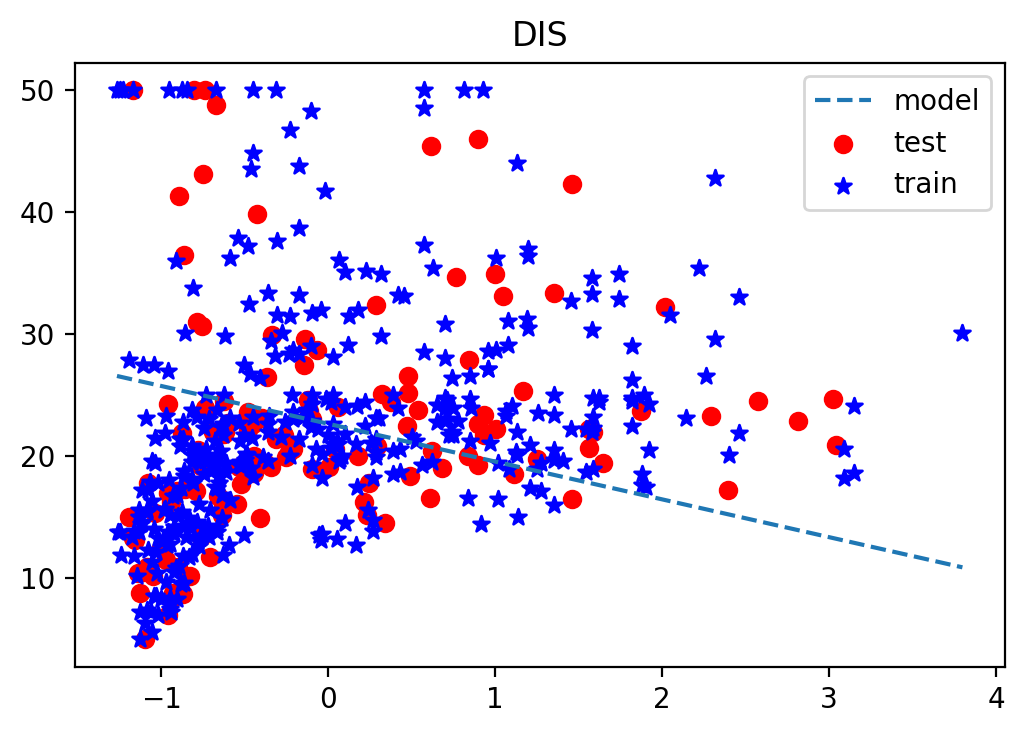

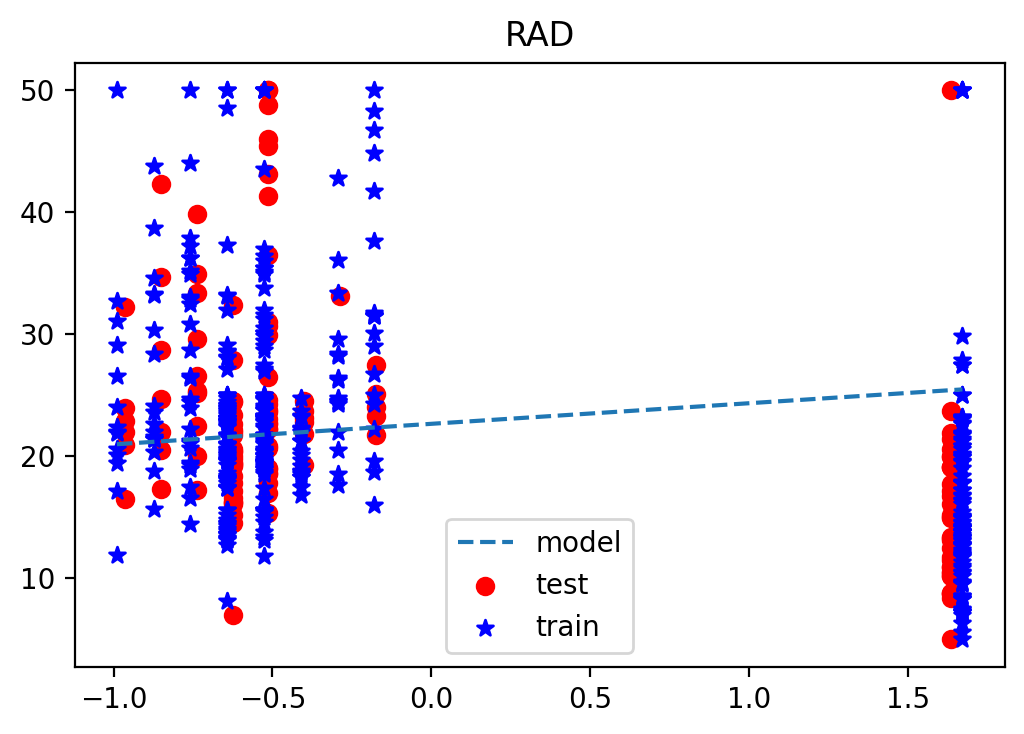

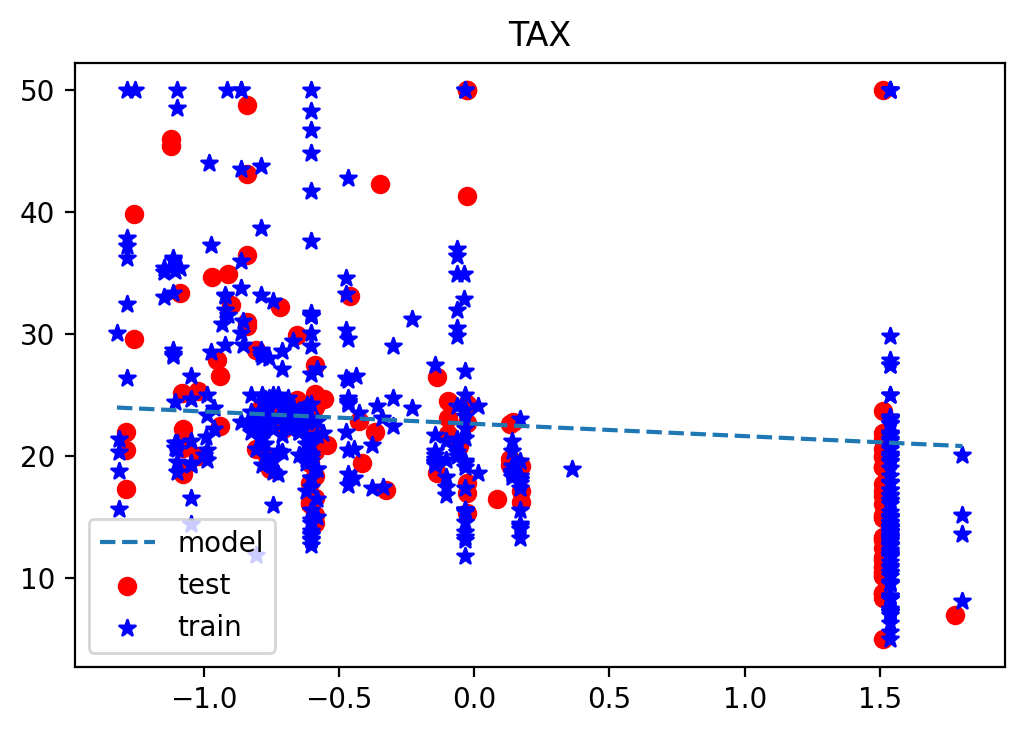

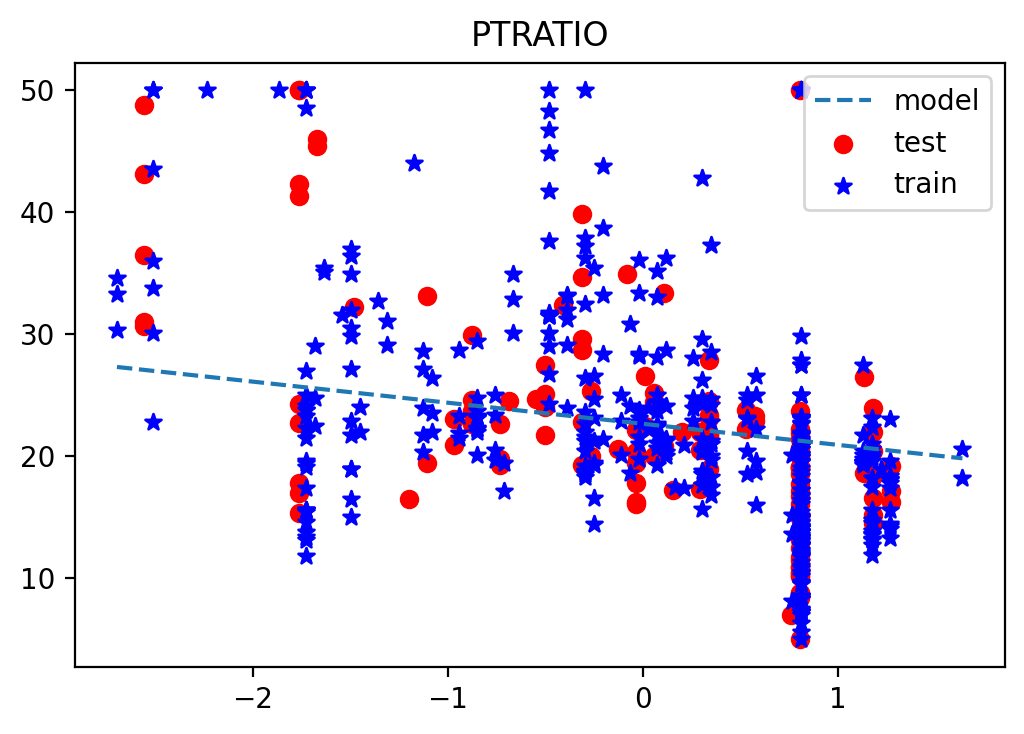

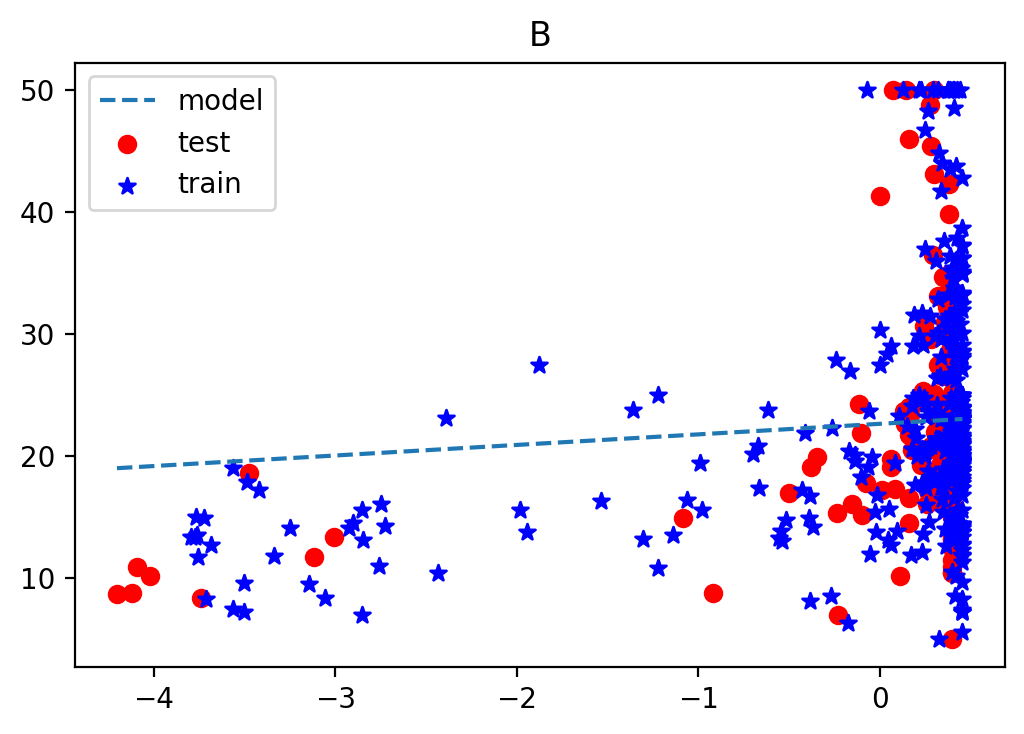

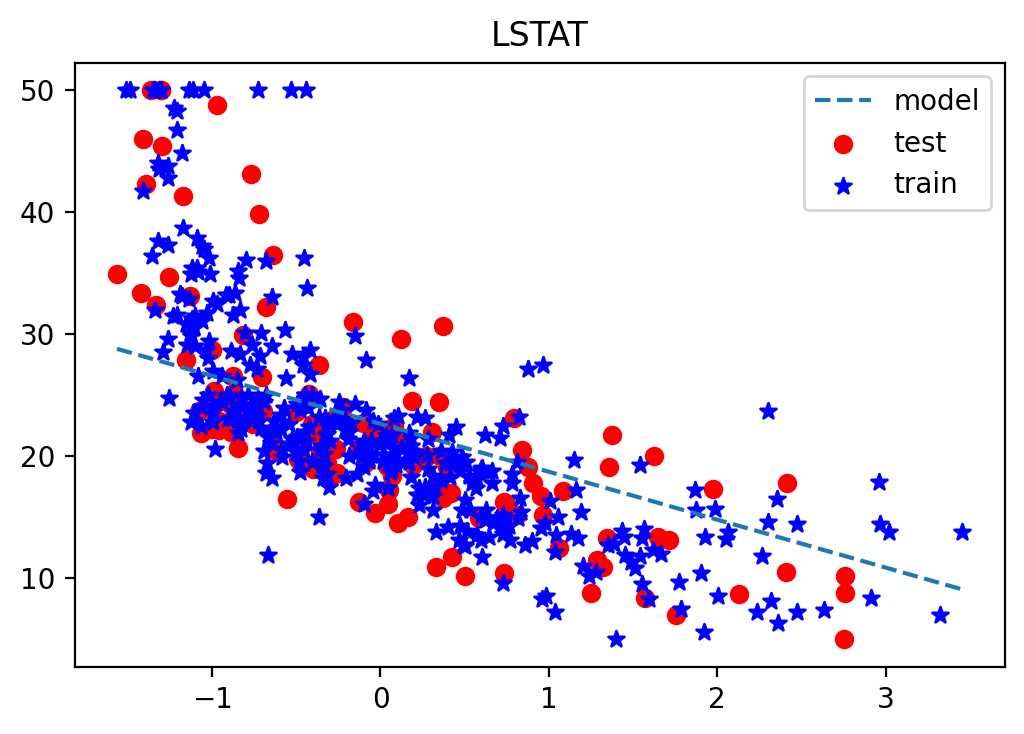

In [28]:
### 波士顿房价预测
### 梯度下降回归
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# 把数据拆分为训练数据和测试数据
boston_data = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target, test_size=0.25, random_state=22)

# 数据预处理
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# 模型拟合
estimator = SGDRegressor(max_iter=1000)
estimator.fit(x_train, y_train)
est_coef = estimator.coef_
est_intpt = estimator.intercept_

# 数据预测
y_predict = estimator.predict(x_test)

# 模型评价
print(estimator.score(x_test, y_test))

feature_name = boston_data.feature_names

# 结果可视化
for i in range(feature_name.shape[0]):
    xi_test = x_test[:, i]
    xi_train = x_train[:, i]
    xi_hstack = np.hstack((xi_train, xi_test))
    xi_max = np.max(xi_hstack)
    xi_min = np.min(xi_hstack)
    x_line = np.linspace(xi_min, xi_max, 1000)
    y_line = x_line*est_coef[i] + est_intpt
    temp_fig = plt.figure(i, dpi=200)
    
    plt.title(feature_name[i])
    plt.scatter(x=xi_test, y=y_test, marker='o', c='red', label='test')
    plt.scatter(x=xi_train, y=y_train, marker='*', c='blue', label='train')
    plt.plot(x_line, y_line, '--', label='model')
    plt.legend()
    temp_fig.show()

## 3.欠拟合和过拟合
- 欠拟合：特征过少，对于训练数据不能很好地拟合
- 过拟合：特征太多，对于训练数据可以**非常好**地拟合，但是对于测试数据不能很好地拟合

## 4.正则化
解决办法：在代价函数中加入惩罚项，减少特征的维度
1. 岭回归
$$J(\theta ) = \frac{1}{m}\sum^{m}_{i=1}(\theta ^{T}\cdot x^{(i)} - y^{(i)})^2 + \alpha\sum^n_{i=1}\theta ^2_i $$

2. Lasso回归
$$J(\theta ) = \frac{1}{m}\sum^{m}_{i=1}(\theta ^{T}\cdot x^{(i)} - y^{(i)})^2 + \alpha\sum^n_{i=1}|\theta _i| $$   

3. Elastic Net(弹性网络)
$$J(\theta ) = \frac{1}{m}\sum^{m}_{i=1}(\theta ^{T}\cdot x^{(i)} - y^{(i)})^2 + r\alpha\sum^n_{i=1}|\theta _i| + \frac{1-r}{2}\alpha\sum^n_{i=1}\theta ^2_i $$


d:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

0.7606412196899792


<ipython-input-34-f31e21435d0d>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()
<ipython-input-34-f31e21435d0d>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()
<ipython-input-34-f31e21435d0d>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()


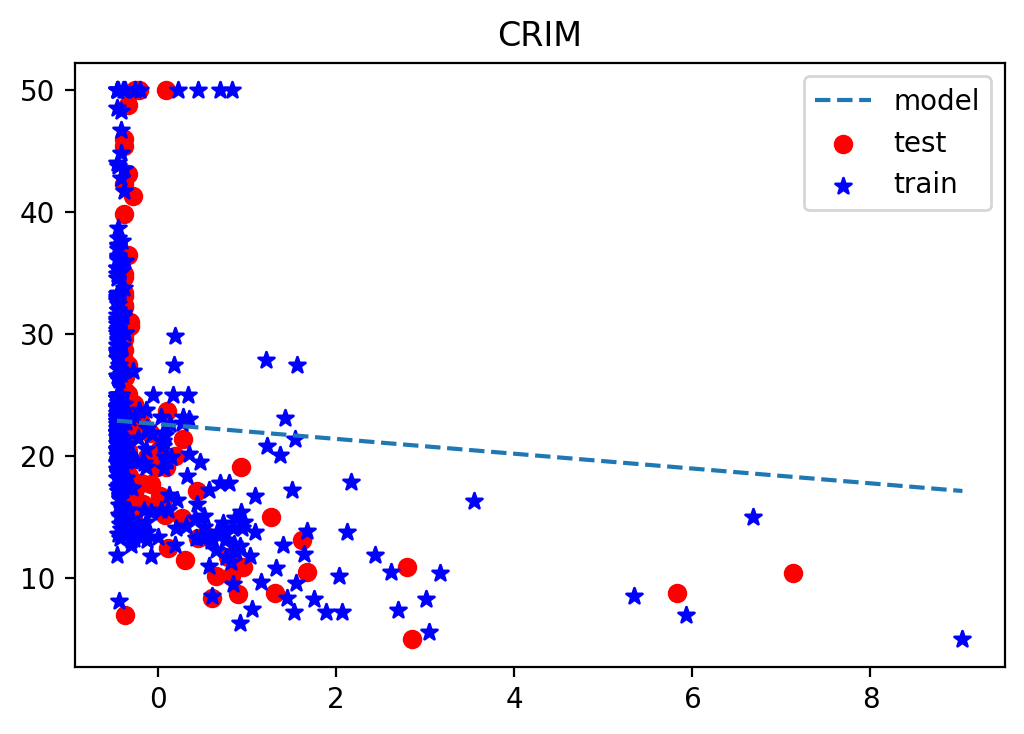

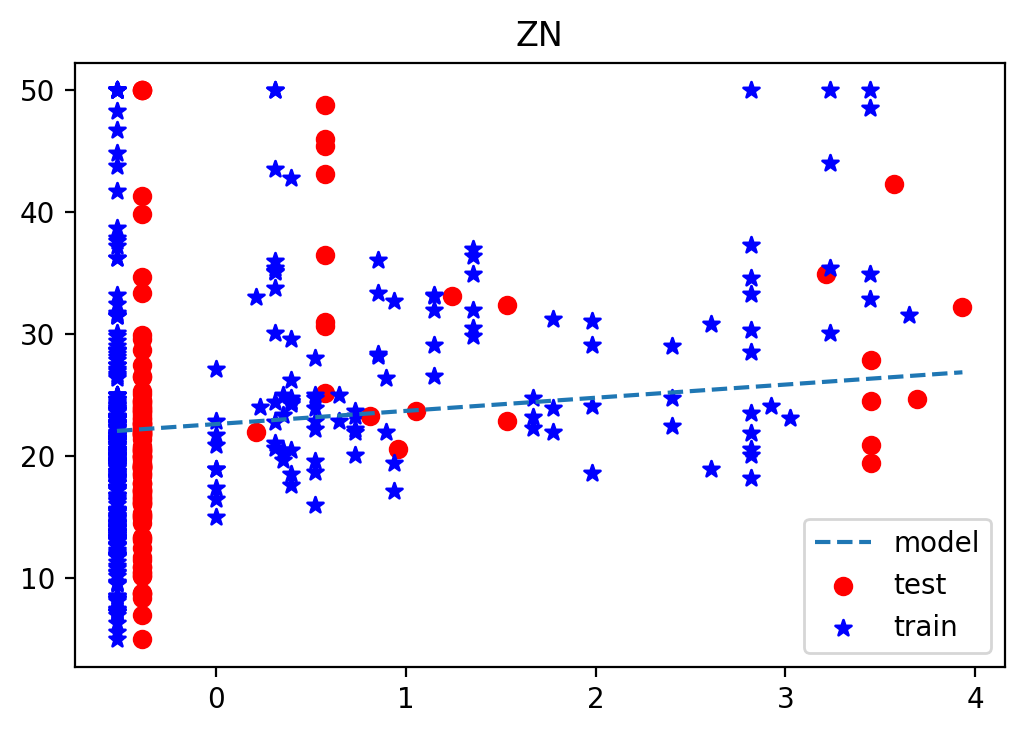

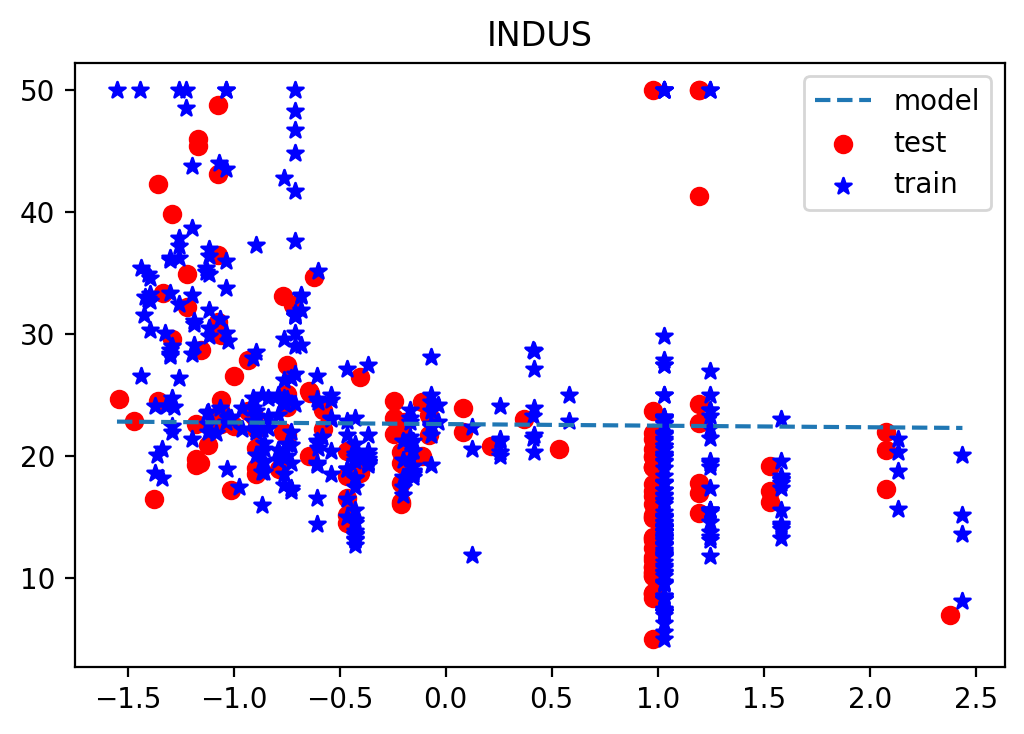

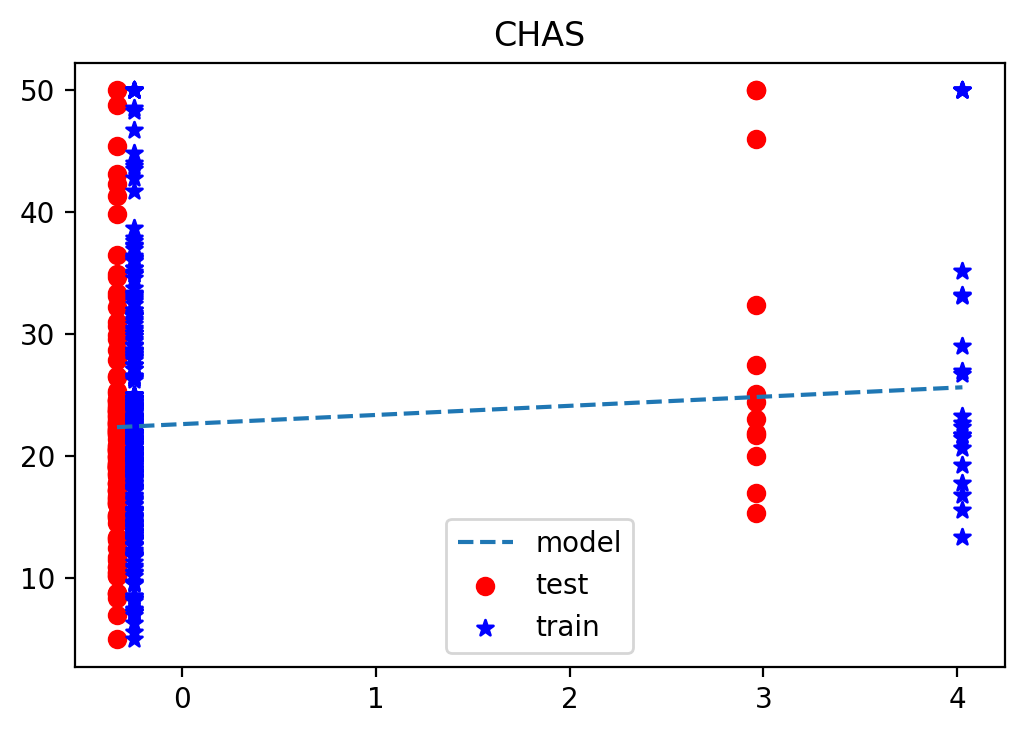

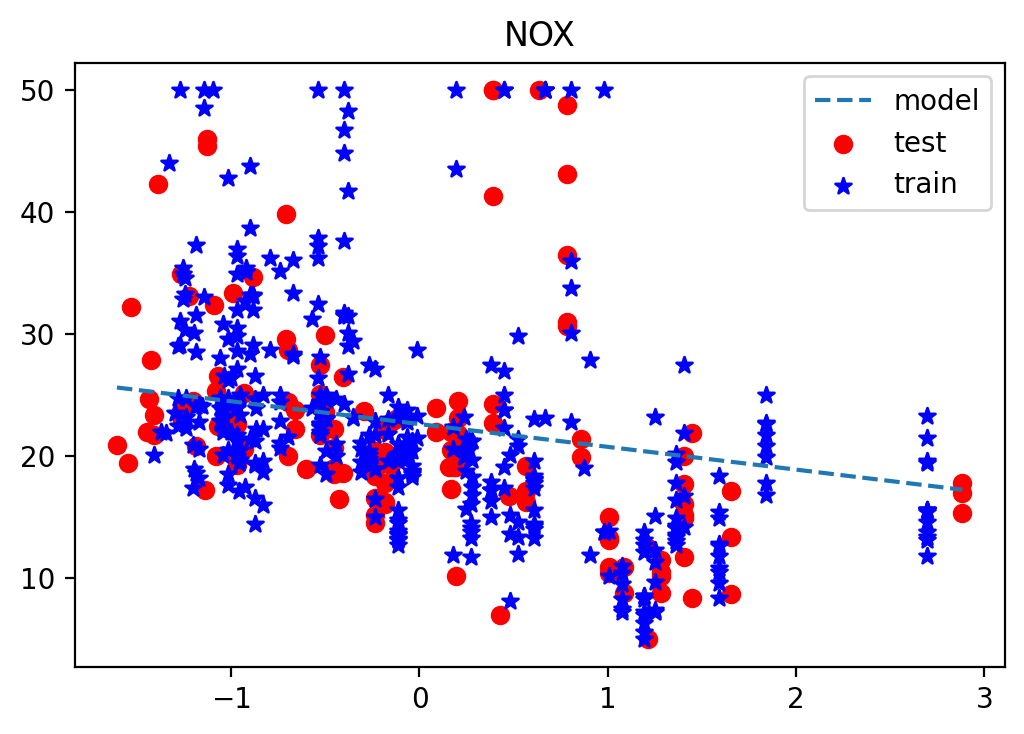

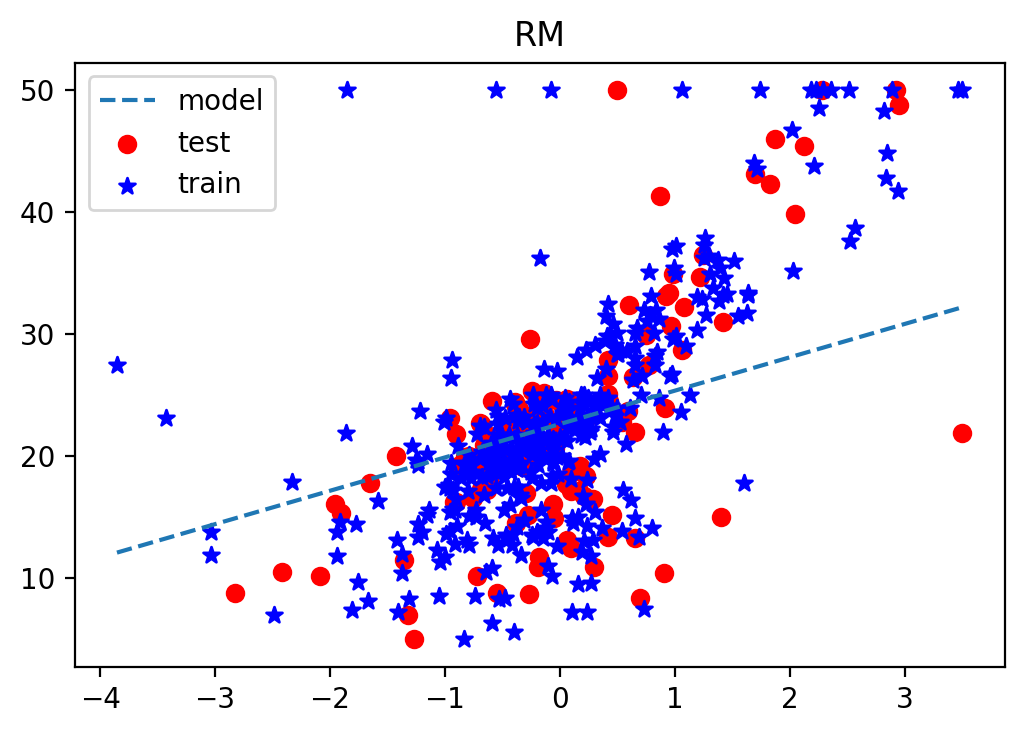

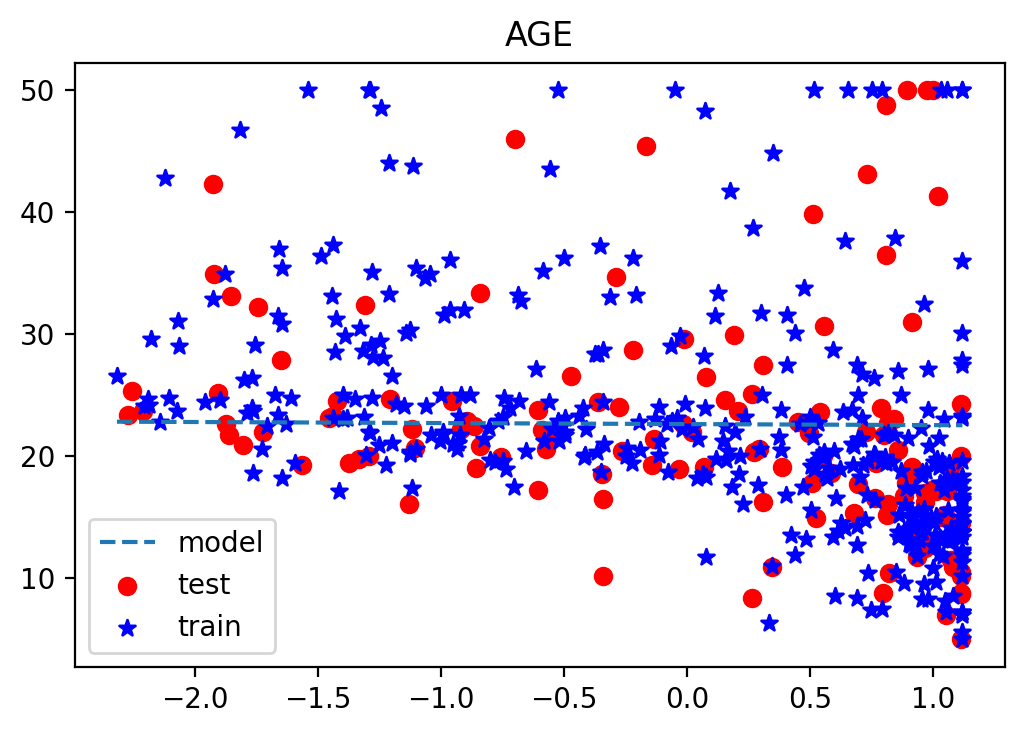

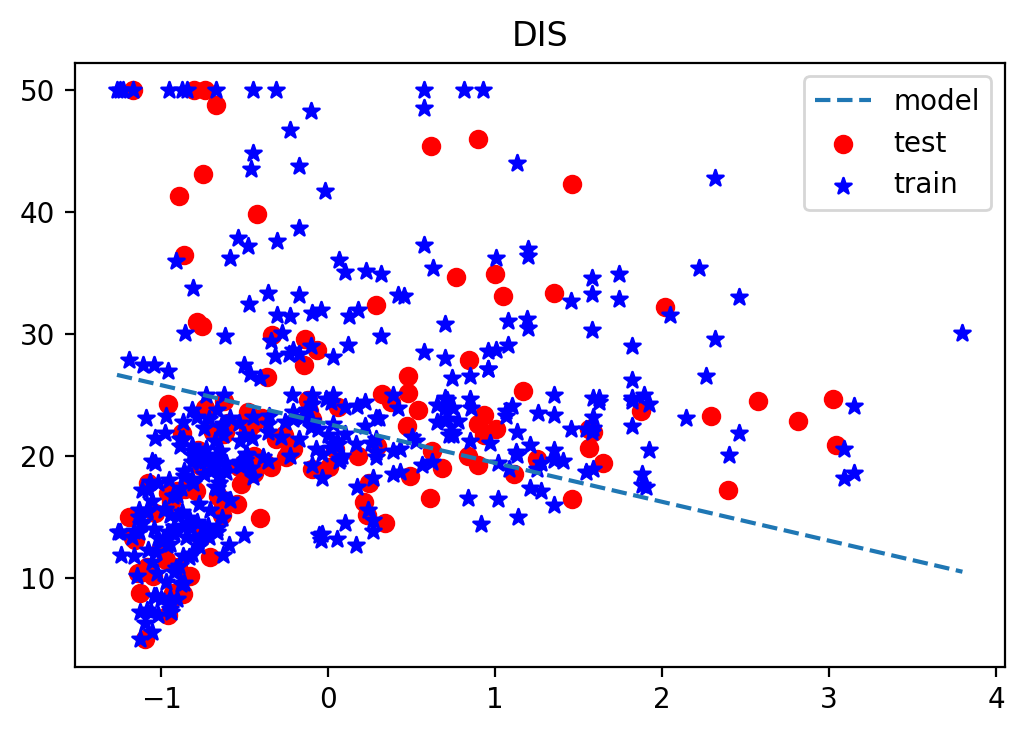

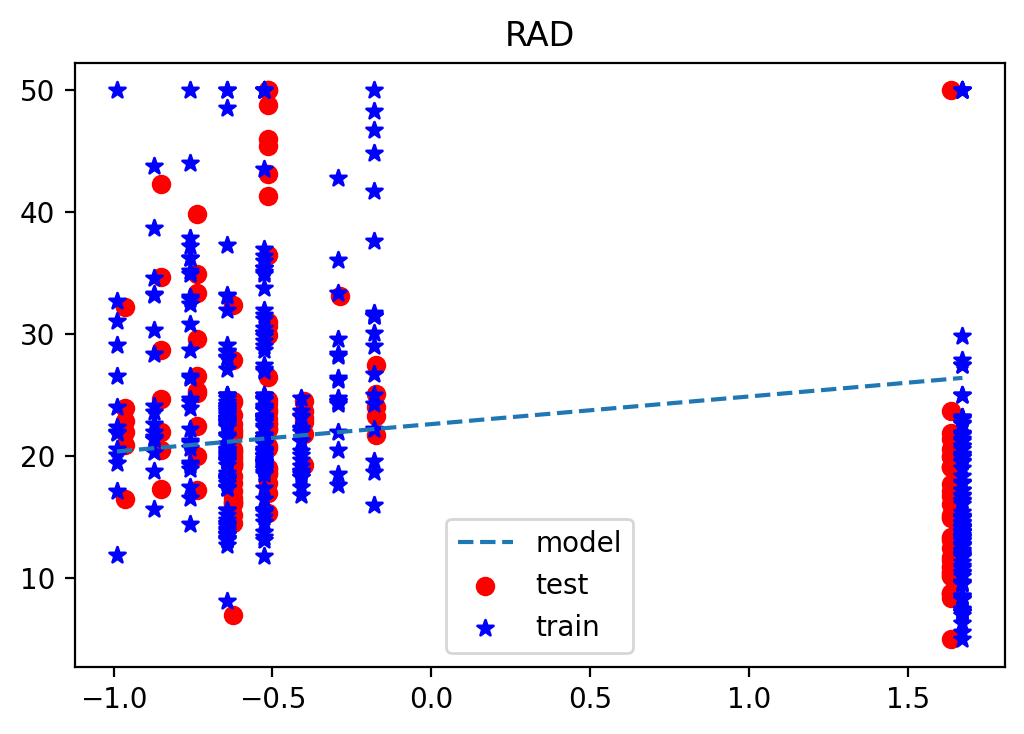

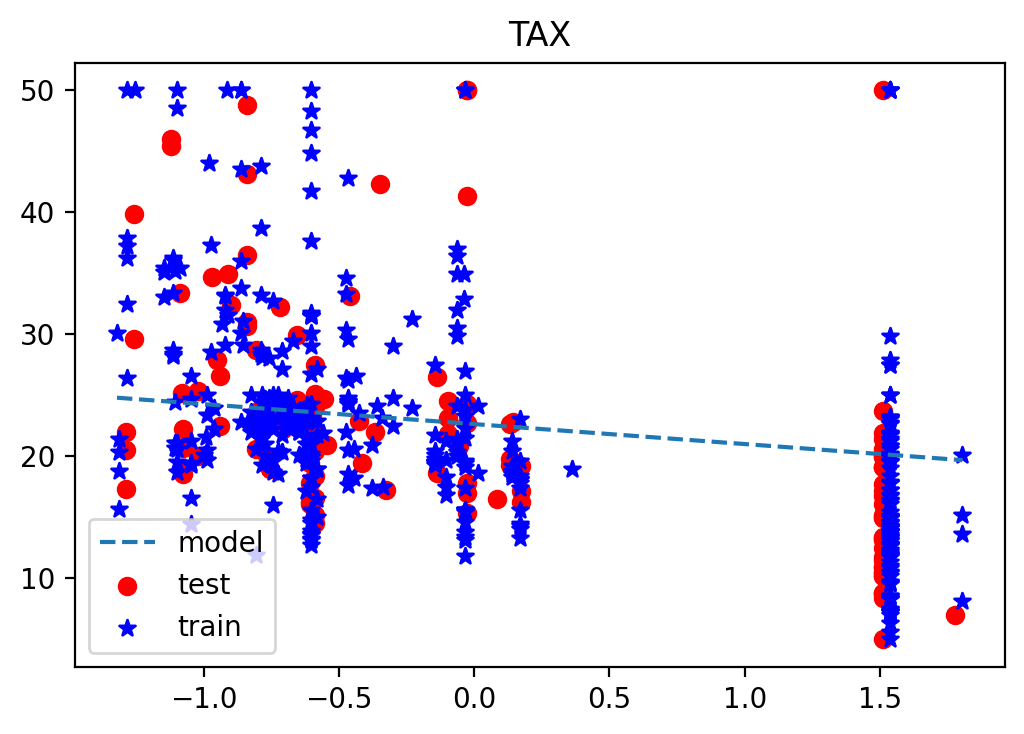

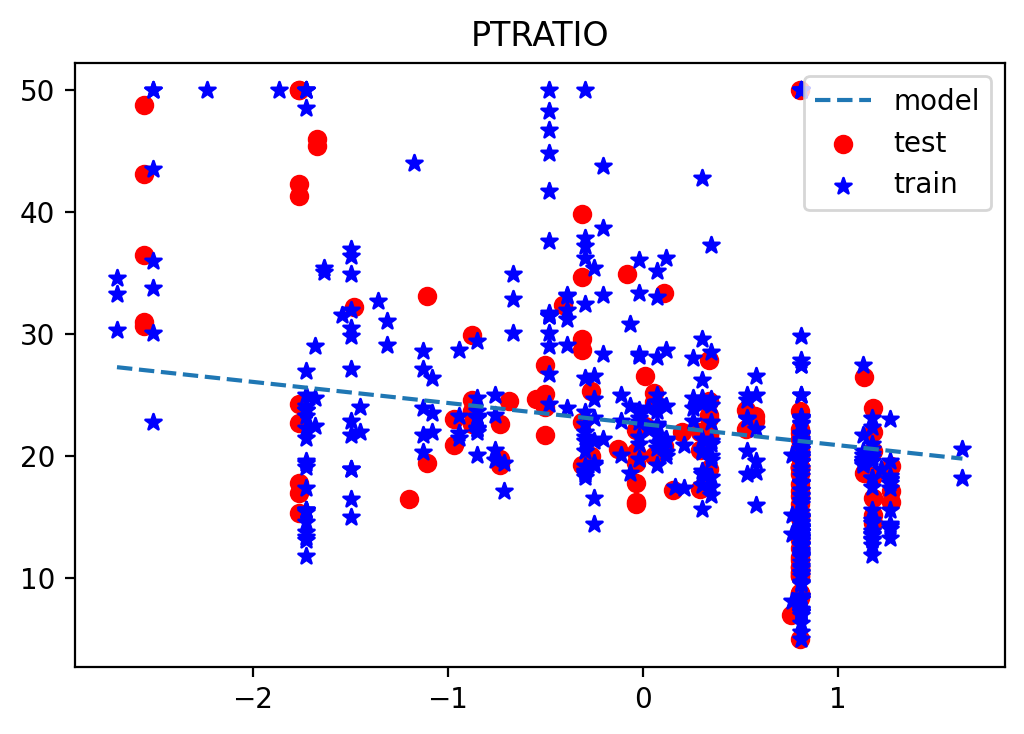

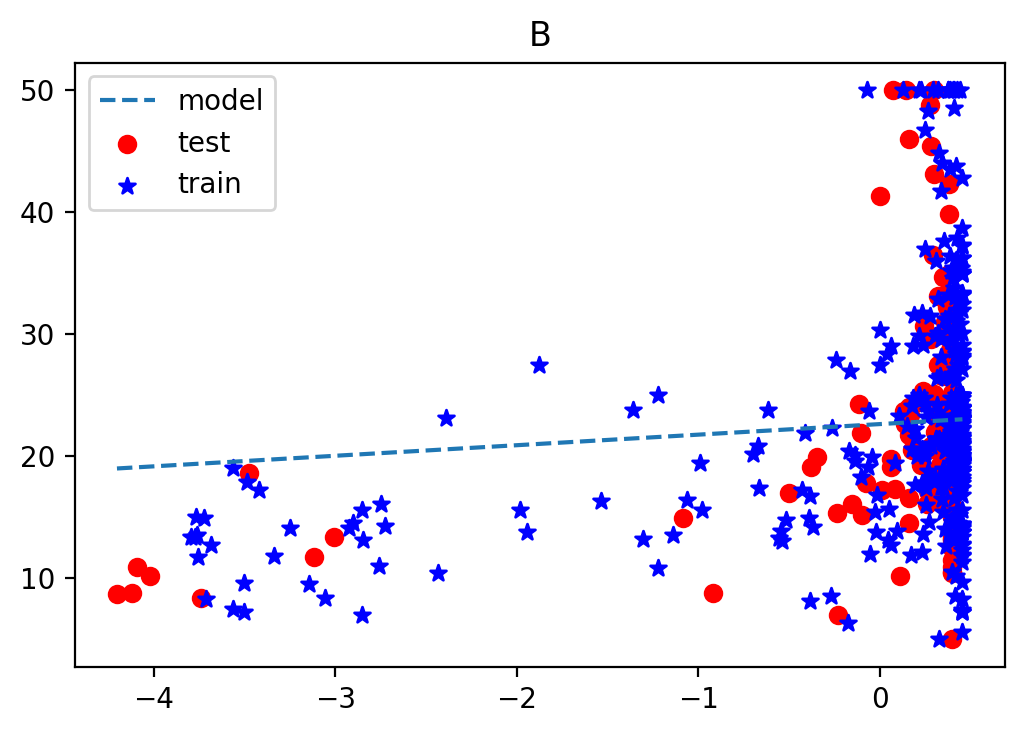

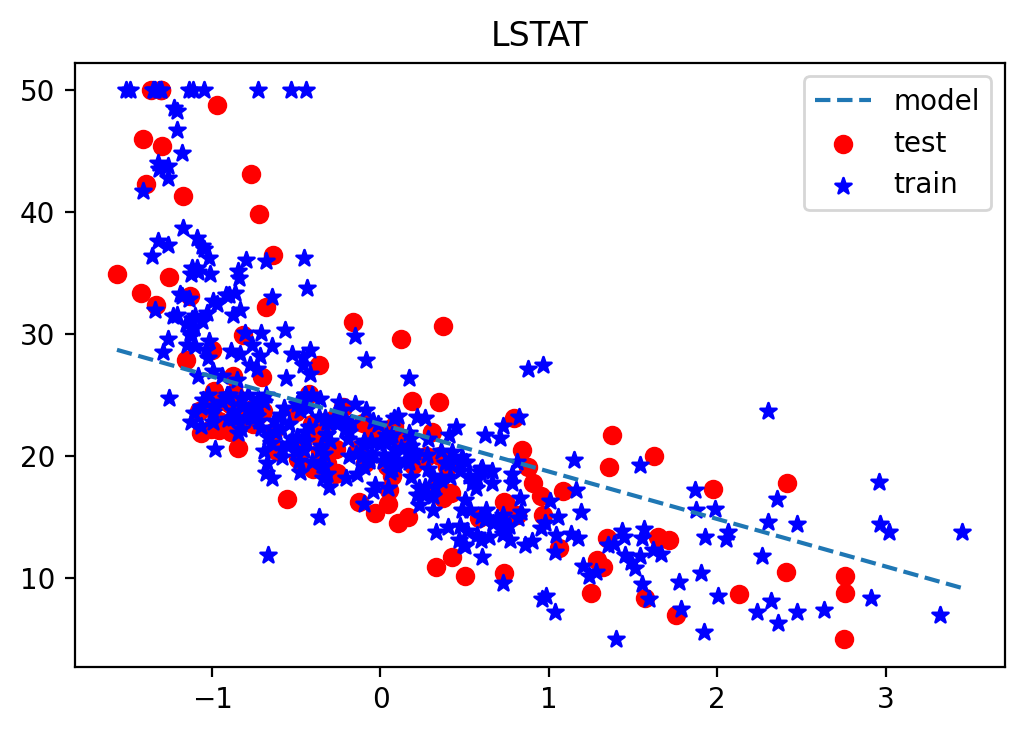

In [34]:
### 波士顿房价预测
### 使用弹性网络
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

# 把数据拆分为训练数据和测试数据
boston_data = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target, test_size=0.25, random_state=22)

# 数据预处理
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# 模型拟合
estimator = ElasticNet(alpha=0.01, l1_ratio=0.5)
estimator.fit(x_train, y_train)
est_coef = estimator.coef_
est_intpt = estimator.intercept_

# 数据预测
y_predict = estimator.predict(x_test)

# 模型评价
print(estimator.score(x_test, y_test))

feature_name = boston_data.feature_names

# 结果可视化
for i in range(feature_name.shape[0]):
    xi_test = x_test[:, i]
    xi_train = x_train[:, i]
    xi_hstack = np.hstack((xi_train, xi_test))
    xi_max = np.max(xi_hstack)
    xi_min = np.min(xi_hstack)
    x_line = np.linspace(xi_min, xi_max, 1000)
    y_line = x_line*est_coef[i] + est_intpt
    temp_fig = plt.figure(i, dpi=200)
    
    plt.title(feature_name[i])
    plt.scatter(x=xi_test, y=y_test, marker='o', c='red', label='test')
    plt.scatter(x=xi_train, y=y_train, marker='*', c='blue', label='train')
    plt.plot(x_line, y_line, '--', label='model')
    plt.legend()
    temp_fig.show()

## 5.模型保存和加载
**注意：joblib是sklearn的外部模块，所以要导入的前提是首先要安装joblib模块**
安装方法：pip install joblib

In [36]:
from sklearn.externals import joblib
joblib.dump(estimator, 'test.pkl')
estimator = joblib.load('test.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (d:\Anaconda\lib\site-packages\sklearn\externals\__init__.py)

## 6.逻辑回归
关键：**解决二分类问题**

sigmoid函数：$g(x)=\frac{1}{1+e^{-x}} $

函数图像如下

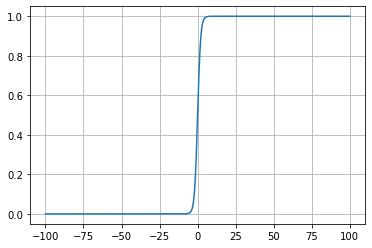

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-100, 100, 1000)
y = 1.0/(1.0+np.exp(-1.0*x))
plt.figure()
plt.grid()
plt.plot(x, y)

- sigmoid函数的范围在(0,1)之内，为一个概率值，逻辑回归的思想是通过概率值的大小来判断属于哪个类别，相应的模型为：
$$
h_{\theta}(x_0, x_1, \dots, x_n) = \frac{1}{1+e^{-\sum^n_{i=0}}\theta _i x_i} 
$$

- 损失函数的形式：
$$
J(\theta _0, \theta _1, \dots, \theta _n) = \sum^{m}_{i=1} -y_ilog(h_{theta}(x))-(1-y_i)log(1-h_{\theta}(x))
$$
从这个函数的形式可以看出来：
- 当y=0时，$h_{\theta}(x) $的值越小损失函数越小
- 当y=1时，$h_{\theta}(x) $的值越大损失函数越小

In [46]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=33)

transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)

estimator = LogisticRegression(max_iter=1000)
estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_test)
print(estimator.score(x_test, y_test))
#print(estimator.coef_)
#print(estimator.intercept_)

cls_report = classification_report(y_test, y_predict, target_names=('良性', '恶性'))
print(cls_report)



0.986013986013986
              precision    recall  f1-score   support

          良性       1.00      0.96      0.98        54
          恶性       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



## 7.决策树算法
- 树形结构
- 节点：属性判断
- 分支：输出
- 叶节点：分类结果

信息熵的定义：度量样本集合纯度最常用的一种指标，假定当前样本集合D中第k类样本所占的比例为$p_k$，$p_k=\frac{C^k}{D} $,D为样本的所有数量，$C^{k}$为第k类样本的数量。则D的信息熵定义为
$$
Ent(D) = -\sum _{k=1} ^n \frac{C^k}{D}log\frac{C^k}{D} = -\sum _{k=1}^n p_klog_2 p_k = -p_1log_2 p_1 - p_2log_2p_2-\dots-p_nlog_2p_n
$$
Ent(D)的值越小，则D的纯度越高。

信息增益：由于特征a对训练数据集D的划分所产生的熵的收益，其公式为：
$$
Gain(D, a) = Ent(D) - Ent(D|a) = Ent(D)-\sum ^{V}_{v=1} \frac{D^{v}}{D}Ent(D^v)
$$
其中$D^v $表示D中所有在属性a上取值为$a^v$的样本

其中$Ent(D, a) $是条件熵，计算公式为：
$$
Ent(D, a) = \sum ^{V} _{v=1} \frac{D^v}{D}Ent(D^v) = -\sum ^V _{v=1} \frac{D^v}{D} \sum ^K _{k=1} \frac{C^{kv}}{D^v}log\frac{C^{kv}}{D^v}
$$
其中$D^v$表示属性a中第v个分支节点包含的样本数，$C^{kv}$表示第v个分支节点包含的样本中，第k个类别下包含的样本数。

信息增益越大，“纯度”提升越大，因此可以使用信息增益大小来选择划分属性，ID3决策树学习算法就是使用这一准则来判断。

**信息增益准则对可取值数目较多的属性有偏好，因此可以改进为使用信息增益率来选择最优划分属性，C4.5算法就是使用的这种决策树算法**

增益率的定义为：
$$
Gain\_ratio(D, a) = \frac{Gain(D, a)}{IV(a)}
$$
其中$IV(a)=-\sum ^V _{v=1}\frac{D^v}{D}log\frac{D^v}{D} $

基尼值：
$$
Gini(D)=\sum _{k=1}^{|y|} \sum _{k' \neq k}p_k p_{k'} = 1-\sum _{k=1}^{|y|}p_k^{2}
$$
基尼指数————CART决策树：
$$
Gini\_index(D, a) = \sum _{v=1}^{V}\frac{D^v}{D}Gini(D^v)
$$

|名称|提出时间|分支方式|备注|
|:----:|:----:|:----:|:----:|
|ID3|1975|信息增益|ID3只能对离散属性的数据集构成决策性|
|C4.5|1993|信息增益率|优化后解决了ID3分支过程中总喜欢偏向选择值较多的属性|
|CART|1984|Gini系数|可以进行分类和回归，既能处理离散属性，也可以处理连续属性|

## 8.特征提取
- 字典数据提取

In [4]:
from sklearn.feature_extraction import DictVectorizer

data = [{'city':'上海', 'area':300}, {'city':'武汉', 'area':400}, {'city':'深圳', 'area':100}]
transfer = DictVectorizer(sparse=False)
trans_data = transfer.fit_transform(data)
print(trans_data)

[[300.   1.   0.   0.]
 [400.   0.   1.   0.]
 [100.   0.   0.   1.]]


- 文本特征提取

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
data = ['If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.']
transfer = CountVectorizer(encoding='utf-8')
data = transfer.fit_transform(data)
print(transfer.get_feature_names_out())
print(data.toarray())

###要提取中文字符串，需要先导入结巴(jieba)库对中文文本进行分词，然后再做提取

['an' 'analyzer' 'analyzing' 'and' 'be' 'by' 'data' 'dictionary' 'do'
 'does' 'equal' 'feature' 'features' 'found' 'if' 'kind' 'not' 'number'
 'of' 'priori' 'provide' 'selection' 'size' 'some' 'that' 'the' 'then'
 'to' 'use' 'vocabulary' 'will' 'you']
[[2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 3 1 1 1 1 1 2]]


In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

data = pd.read_csv("./titanic/train.csv")

x = data[['Pclass', 'Age', 'Sex']]
y = data['Survived']

### 处理缺失值
x['Age'].fillna(x['Age'].mean(), inplace=True)

x_dict = x.to_dict(orient='records')
transfer = DictVectorizer(sparse=False)

x_new = transfer.fit_transform(x_dict)

x_feature_names = transfer.feature_names_

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25, random_state=22)

estimator = DecisionTreeClassifier(criterion='gini', max_depth=10)
estimator.fit(x_train, y_train)
print(estimator.score(x_test, y_test))

export_graphviz(estimator, out_file='./titanic/tree.dot', feature_names=x_feature_names)


0.7713004484304933


<ipython-input-38-bc33602b27b9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'].fillna(x['Age'].mean(), inplace=True)


### 回归决策树
基于连续值目标的决策树方法，原理较为复杂，最后的结果是类似于用分段函数来拟合目标结果。